# Combat
scanpy에서 바로 사용할 수 있는 batch effect correction tool.\
[공식 문서](https://scanpy.readthedocs.io/en/latest/api/generated/scanpy.pp.combat.html)

In [2]:
import scanpy as sc

# Load data

In [3]:
folder_path = "C:/Users/heung/OneDrive/Documents/scData/14. GSE136001_RAW/"
adata = sc.read(folder_path + "preprocessed_adata.h5ad")

In [ ]:
adata

# Batch 확인

In [4]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

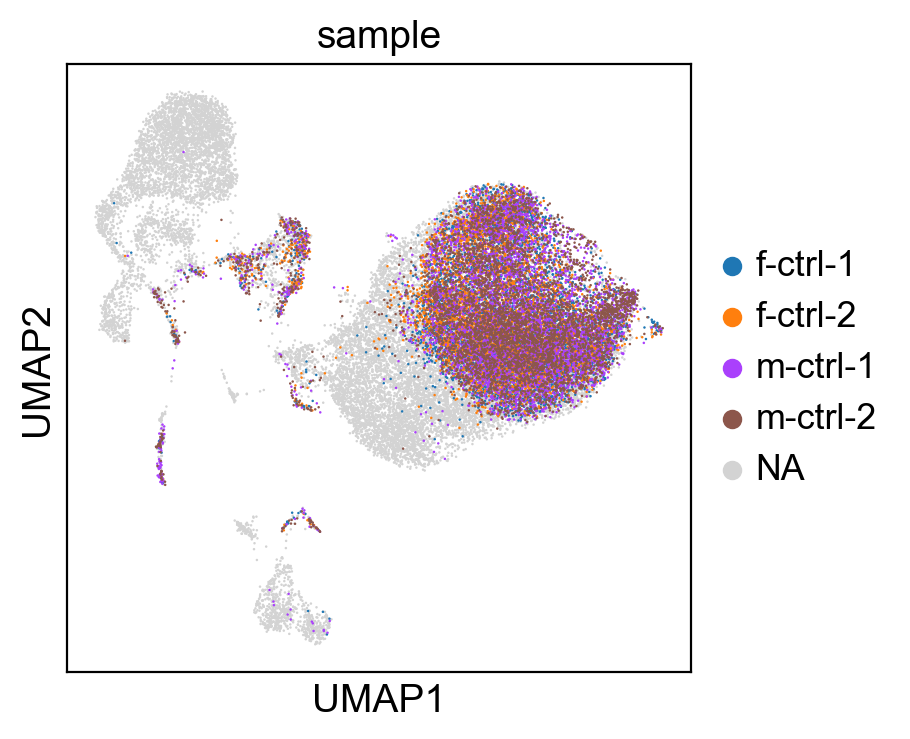

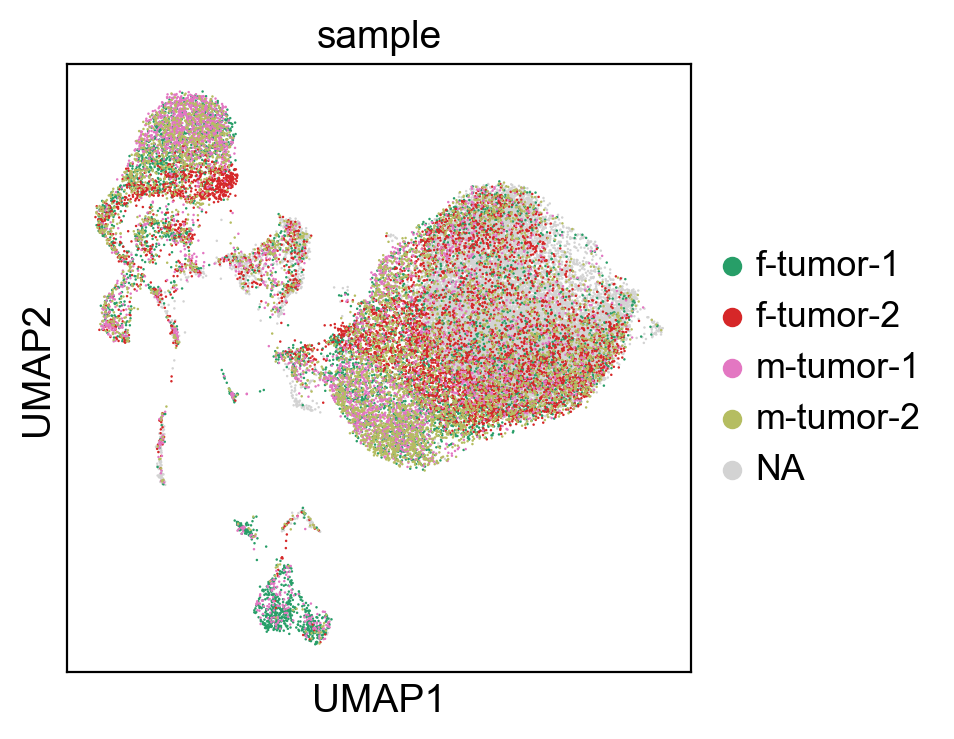

In [5]:
sc.settings.set_figure_params(dpi=100, figsize = (4, 4))
sc.pl.umap(
    adata,
    color = 'sample',
    groups = ['f-ctrl-1', 'f-ctrl-2', 'm-ctrl-1', 'm-ctrl-2',],
)
sc.pl.umap(
    adata,
    color = 'sample',
    groups = ['f-tumor-1', 'f-tumor-2', 'm-tumor-1', 'm-tumor-2',],
)

# Batch effect correction by Combat

In [6]:
sc.pp.combat(adata, key = 'sample')
# 56.7s for 37k cells and 20k genes

c:\Users\heung\anaconda3\Lib\site-packages\scanpy\preprocessing\_combat.py:352: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


# Batch correction 확인

In [7]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

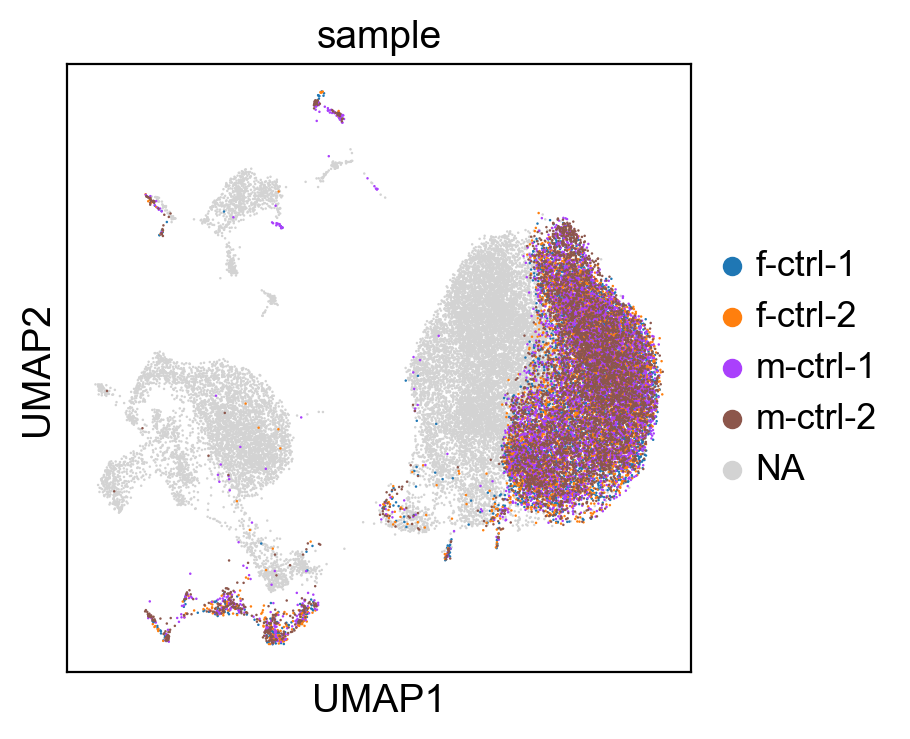

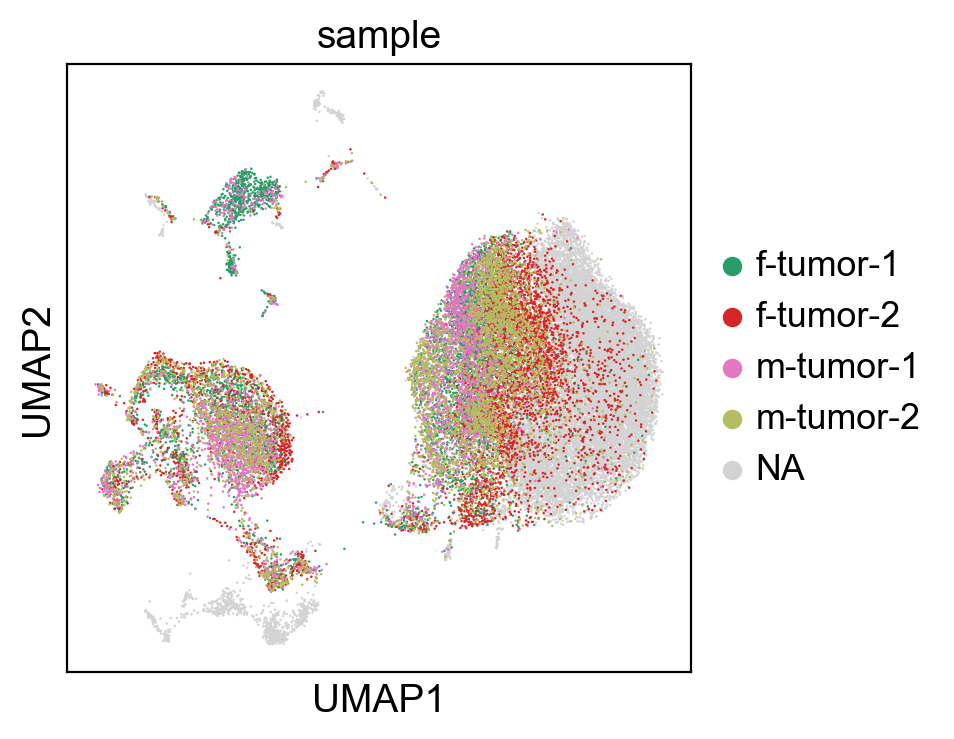

In [8]:
sc.settings.set_figure_params(dpi=100, figsize = (4, 4))
sc.pl.umap(
    adata,
    color = 'sample',
    groups = ['f-ctrl-1', 'f-ctrl-2', 'm-ctrl-1', 'm-ctrl-2',],
)
sc.pl.umap(
    adata,
    color = 'sample',
    groups = ['f-tumor-1', 'f-tumor-2', 'm-tumor-1', 'm-tumor-2',],
)

> 어째 batch effect가 더 늘어난 느낌이 든다

# Save

In [9]:
adata.write(folder_path + "adata_combat.h5ad")

> 왜인지 파일 용량도 개큼. BBKNN (980MB) 의 약 5배 (5.54GB). 잘 안쓸듯...